## 20170101 ~ 20250630 데이터 제작

In [68]:
### 2017년 1월 1일부터 2025년 6월 30일까지 모든 날짜 데이터 만들기 ###
# 2017-01-01 ~ 2025-06-30 을 한 행으로 하는 '날짜' 컬럼 생성, '요일'컬럼에는 해당 날짜가 무슨 요일인지 요일에 해당하는 값 넣어주기
# '../results/공휴일정보_2017_2025.csv'에 해당하는 날짜에 대해 '공휴일'컬럼 만들어서 '../results/공휴일정보_2017_2025.csv'의 '이름' 컬럼 정보를 넣어주기

import pandas as pd

# 전체 날짜 범위로 데이터프레임 생성
date_range = pd.date_range(start='2017-01-01', end='2025-06-30', freq='D')
df = pd.DataFrame({'날짜': date_range})
df['요일'] = df['날짜'].dt.day_name(locale='ko_KR')  # 요일 한글로 
# df['요일'] = df['날짜'].dt.dayofweek.map(['월', '화', '수', '목', '금', '토', '일'])
# df['요일'] = df['날짜'].dt.weekday # 월요일 :0, 화:1, ..., 일:6 숫자로 반환

# 공휴일 정보
holidays = pd.read_csv('../results/공휴일정보_2017_2025.csv', parse_dates=['날짜'], encoding='utf-8-sig')

# 날짜 기준으로 병합 df 기준 left 병합
df = df.merge(holidays[['날짜', '이름']], on='날짜', how='left')
df = df.rename(columns={'이름': '공휴일'})  # 이름 컬럼을 공휴일로 바꿈

df


,날짜,요일,공휴일
0,2017-01-01,일요일,신정
1,2017-01-02,월요일,NaN
2,2017-01-03,화요일,NaN
3,2017-01-04,수요일,NaN
4,2017-01-05,목요일,NaN
...,...,...,...
3100,2025-06-26,목요일,NaN
3101,2025-06-27,금요일,NaN
3102,2025-06-28,토요일,NaN
3103,2025-06-29,일요일,NaN


In [69]:
df['공휴일'].isnull().sum()

np.int64(2948)

In [70]:
df.to_csv('../results/전체날짜_공휴일포함_2017_2025.csv', index=False)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3105 non-null   datetime64[ns]
 1   요일      3105 non-null   object        
 2   공휴일     157 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 72.9+ KB


## EDA

In [72]:
import platform
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

os = platform.system()

# Windows
if os == 'Windows':
    plt.rc('font', family= 'Malgun Gothic')

# Mac
elif os == 'Darwin':
    plt.rc('font', family= 'AppleGothic')

# Linux
elif os == 'Linux':
    plt.rc('font', family= 'NanumGothic')

else:
    print(f'{os} is not set')

df = pd.read_csv('../results/전체날짜_공휴일포함_2017_2025.csv', encoding='utf-8-sig')
df

,날짜,요일,공휴일
0,2017-01-01,일요일,신정
1,2017-01-02,월요일,NaN
2,2017-01-03,화요일,NaN
3,2017-01-04,수요일,NaN
4,2017-01-05,목요일,NaN
...,...,...,...
3100,2025-06-26,목요일,NaN
3101,2025-06-27,금요일,NaN
3102,2025-06-28,토요일,NaN
3103,2025-06-29,일요일,NaN


In [73]:
### 기본적인 데이터 구조 파악
print(df.shape)              # 행과 열 개수 -> (3105, 3)
print(df.dtypes )            # 각 컬럼 데이터 타입 -> 컬럼 3개 : 날짜, 요일, 공휴일
print(df.head() )            # 상위 5개 데이터 확인
print(df.isnull().sum())     # 결측치 확인 -> 3105개의 날짜 중 공휴일은 157일

(3105, 3)
날짜     object
요일     object
공휴일    object
dtype: object
           날짜   요일  공휴일
0  2017-01-01  일요일   신정
1  2017-01-02  월요일  NaN
2  2017-01-03  화요일  NaN
3  2017-01-04  수요일  NaN
4  2017-01-05  목요일  NaN
날짜        0
요일        0
공휴일    2948
dtype: int64


In [74]:
df['공휴일'].value_counts()   # 공휴일 종류 분포 확인

공휴일
설날                    27
추석                    24
대체공휴일                 13
어린이날                   9
삼일절                    9
현충일                    9
개천절                    8
기독탄신일                  8
한글날                    8
1월1일                   8
광복절                    8
부처님오신날                 8
임시공휴일                  5
대통령선거일                 2
대체휴무일                  2
전국동시지방선거               2
신정                     1
석가탄신일                  1
제21대 국회의원선거            1
대체공휴일(설날)              1
국회의원선거                 1
대체공휴일(어린이날)            1
임시공휴일(제21대 대통령 선거)     1
Name: count, dtype: int64

In [80]:
# 공휴일만 추출
df['날짜'] = pd.to_datetime(df['날짜'])
holidays_df = df.dropna(subset=['공휴일']).copy()
holidays_df

,날짜,요일,공휴일,월
0,2017-01-01,일요일,신정,1
26,2017-01-27,금요일,설날,1
27,2017-01-28,토요일,설날,1
28,2017-01-29,일요일,설날,1
29,2017-01-30,월요일,대체공휴일,1
...,...,...,...,...
3047,2025-05-05,월요일,어린이날,5
3048,2025-05-05,월요일,부처님오신날,5
3049,2025-05-06,화요일,대체공휴일,5
3077,2025-06-03,화요일,임시공휴일(제21대 대통령 선거),6


C:\Users\user\AppData\Local\Temp\ipykernel_8012\28319675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='공휴일', order=df['공휴일'].value_counts().index, palette='viridis')


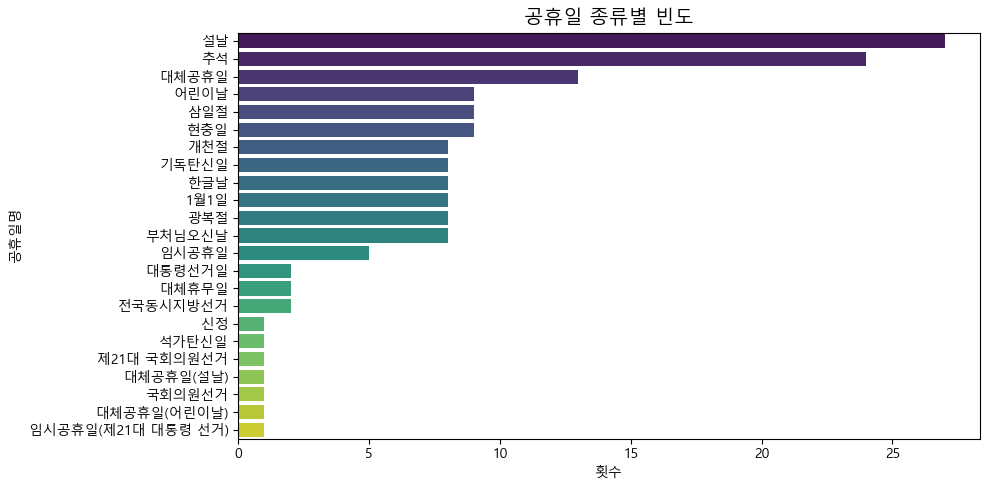

In [83]:
### 공휴일 종류별 빈도 ###
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='공휴일', order=df['공휴일'].value_counts().index, palette='viridis')
plt.title("공휴일 종류별 빈도", fontsize=14)
plt.xlabel("횟수")
plt.ylabel("공휴일명")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_8012\2977563279.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=holidays_df, x='월', palette='coolwarm')


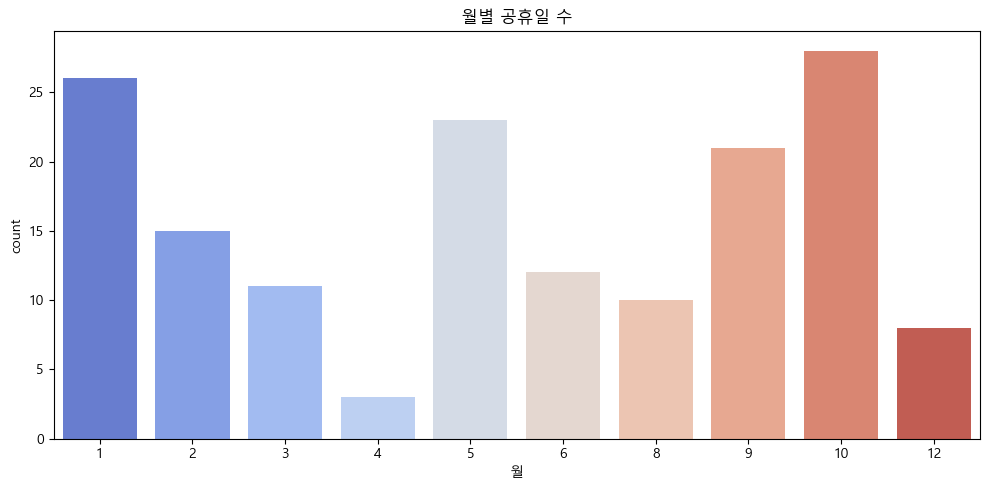

In [ ]:
### 월별 공휴일 분포 ###
# 2017~2025까지 월별 공휴일 수

holidays_df['월'] = holidays_df['날짜'].dt.month

plt.figure(figsize=(10, 5))
sns.countplot(data=holidays_df, x='월', palette='coolwarm')
plt.title("월별 공휴일 수")
plt.tight_layout()
plt.show()


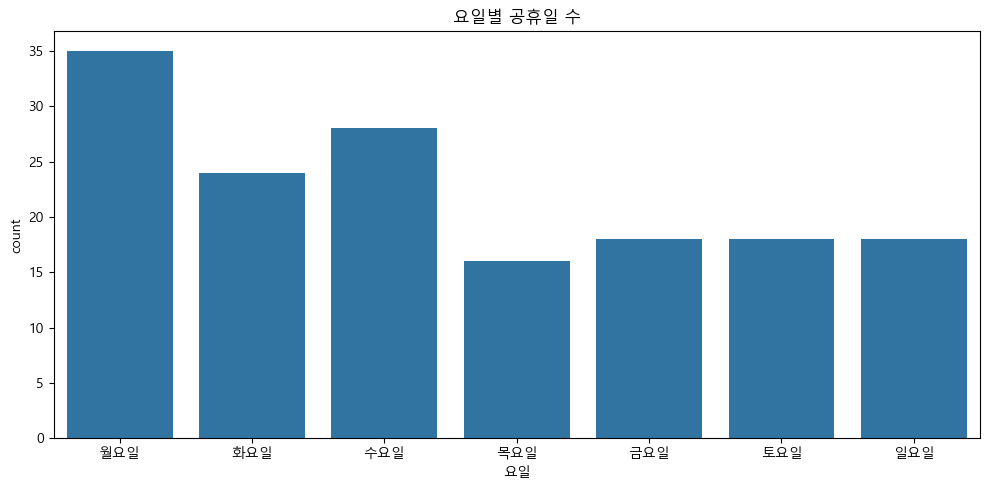

In [ ]:
### 요일별 공휴일 분포 ###
# 주말과 겹치는 공휴일이 많은지 파악 가능 #
weekday_order = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

plt.figure(figsize=(10, 5))
sns.countplot(data=holidays_df, x='요일', order=weekday_order)
plt.title("요일별 공휴일 수")
plt.tight_layout()
plt.show()
## 결과가 생각보다 월,화,수 비율이 높아서 주말 연결해 휴일로 활용했을 가능성 높음 ##


In [86]:
### 주말이랑 겹치는 공휴일 확인 ###
holidays_df['is_weekend'] = holidays_df['요일'].isin(['토요일', '일요일'])

print(holidays_df['is_weekend'].value_counts())


is_weekend
False    121
True      36
Name: count, dtype: int64


In [106]:
### 공휴일 연속성 분석 -> 연휴 가능성 파악 위해 ###

# 전처리
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜').reset_index(drop=True)
df['is_holiday'] = df['공휴일'].notna()
df['is_weekend'] = df['요일'].isin(['토요일', '일요일'])
df['is_temp_off'] = df['is_holiday'] | df['is_weekend']

# 연속 쉬는 날 그룹핑
df['off_group'] = (df['is_temp_off'] != df['is_temp_off'].shift()).cumsum()

# 쉬는 날 블록 정보 추출
def extract_labels(sub_df):
    labels = []
    for _, row in sub_df.iterrows():
        if pd.notna(row['공휴일']):
            labels.append(row['공휴일'])
        elif row['요일'] in ['토요일', '일요일']:
            labels.append(row['요일'])
    return labels

grouped = df[df['is_temp_off']].groupby('off_group')

records = []
for _, group in grouped:
    if (group['is_holiday'].sum() >= 1) and (len(group) >= 2):  # 공휴일 포함 + 2일 이상
        records.append({
            '연휴시작': group['날짜'].min(),
            '연휴끝': group['날짜'].max(),
            '연휴일수': len(group),
            '공휴일목록': extract_labels(group)
        })

cont_holidays = pd.DataFrame(records)
cont_holidays

,연휴시작,연휴끝,연휴일수,공휴일목록
0,2017-01-27,2017-01-30,4,"[설날, 설날, 설날, 대체공휴일]"
1,2017-05-05,2017-05-07,3,"[어린이날, 토요일, 일요일]"
2,2017-09-30,2017-10-09,11,"[토요일, 일요일, 임시공휴일, 개천절, 추석, 추석, 추석, 대체공휴일, 토요일,..."
3,2017-12-23,2017-12-25,3,"[토요일, 일요일, 기독탄신일]"
4,2017-12-30,2018-01-01,3,"[토요일, 일요일, 1월1일]"
5,2018-02-15,2018-02-18,4,"[설날, 설날, 설날, 일요일]"
6,2018-05-05,2018-05-07,3,"[어린이날, 일요일, 대체휴무일]"
7,2018-09-22,2018-09-26,5,"[토요일, 추석, 추석, 추석, 대체휴무일]"
8,2019-02-02,2019-02-06,5,"[토요일, 일요일, 설날, 설날, 설날]"
9,2019-03-01,2019-03-03,3,"[삼일절, 토요일, 일요일]"


In [108]:
cont_holidays.to_csv('../results/2일이상_연휴.csv', encoding='utf=8-sig', index=False)

In [97]:
df['연도'] = df['날짜'].dt.year
연휴길이 = df[df['is_holiday']].groupby(['연도', '연속공휴일']).size()
연도별최대연휴 = 연휴길이.groupby('연도').max()
print(연도별최대연휴)


연도
2017    6
2018    4
2019    3
2020    4
2021    3
2022    4
2023    4
2024    4
2025    4
dtype: int64


In [ ]:
# 연도별 확인 위해
df['날짜'] = pd.to_datetime(df['날짜'])
df['연도'] = df['날짜'].dt.year
holidays_df = df.dropna(subset=['공휴일']).copy()
holidays_by_year = holidays_df['연도'].value_counts().sort_index()


C:\Users\user\AppData\Local\Temp\ipykernel_8012\3587725578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=holidays_by_year.index, y=holidays_by_year.values, palette='crest')


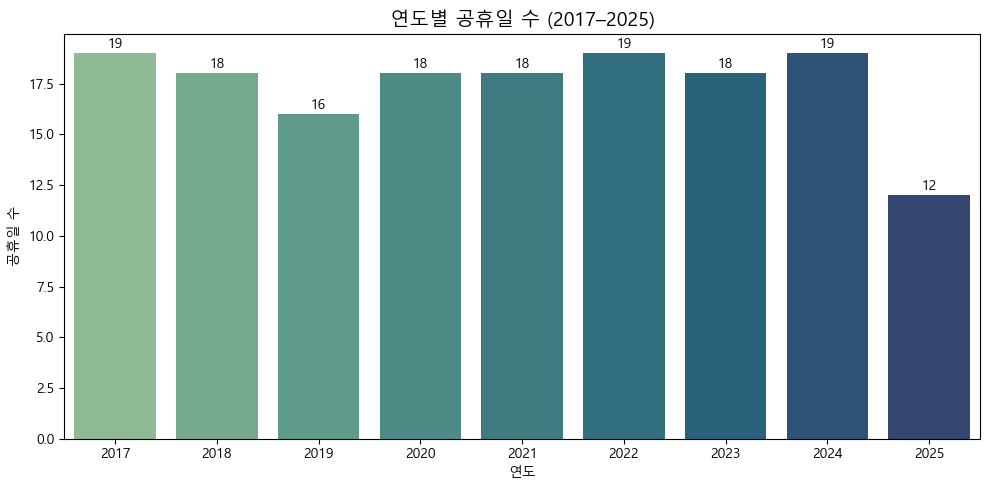

In [91]:
### 연도별 공휴일 수 확인 ###
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=holidays_by_year.index, y=holidays_by_year.values, palette='crest')

# 수치 라벨 추가
for i, value in enumerate(holidays_by_year.values):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.title("연도별 공휴일 수 (2017–2025)", fontsize=14)
plt.xlabel("연도")
plt.ylabel("공휴일 수")
plt.tight_layout()
plt.show()


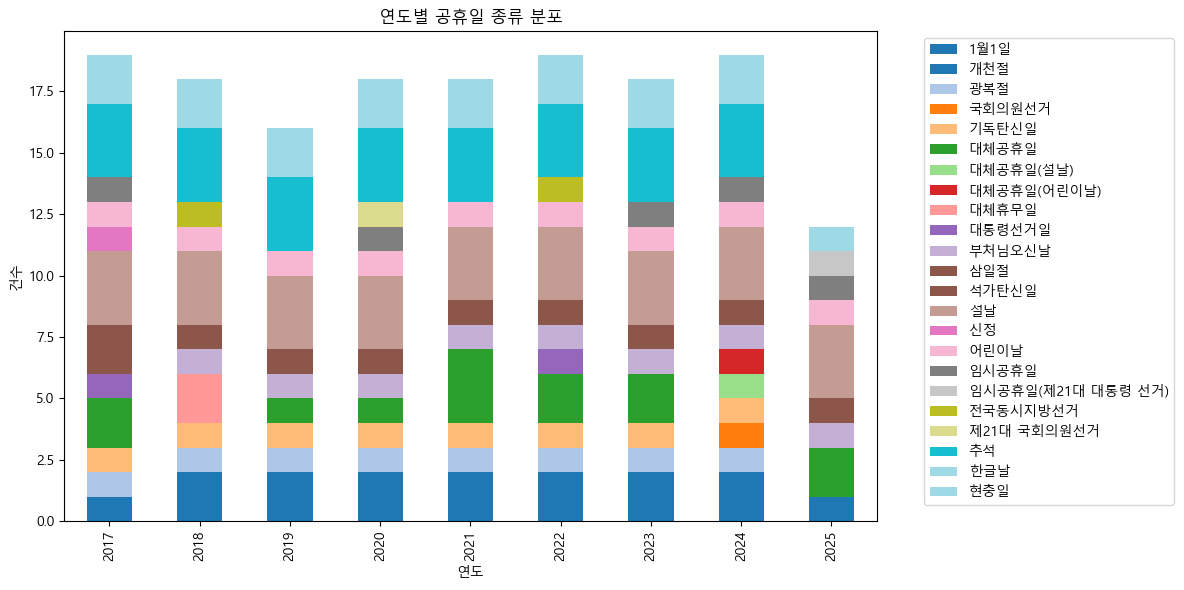

In [ ]:
### 연도별 공휴일 종류 분포 (stack 방식) ###
# 각 연도에 어떤 종류의 공휴일이 있었는지 한번에 확인 가능 #
pivot = holidays_df.pivot_table(index='연도', columns='공휴일', values='날짜', aggfunc='count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('연도별 공휴일 종류 분포')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


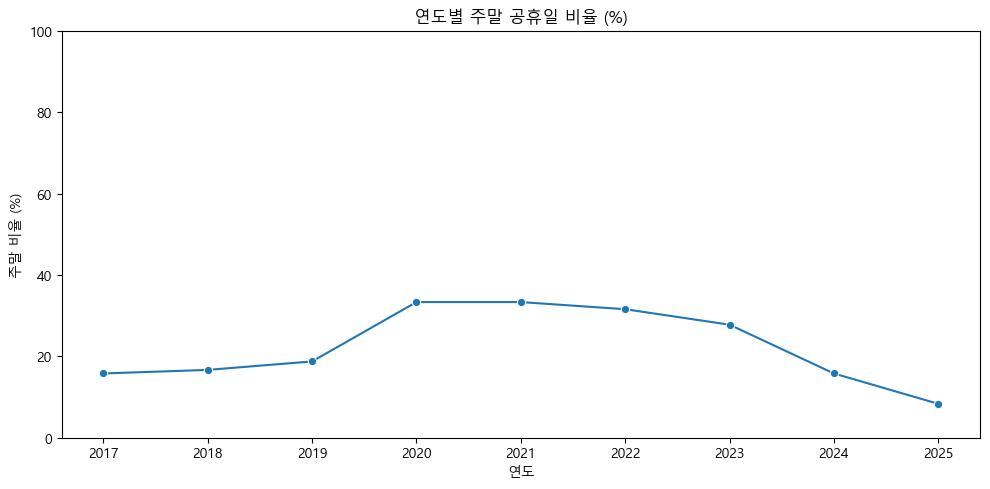

In [93]:
### 연도별 주말 공휴일 비중 ###
holidays_df['is_weekend'] = holidays_df['요일'].isin(['토요일', '일요일'])
weekend_ratio = holidays_df.groupby('연도')['is_weekend'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekend_ratio.index, y=weekend_ratio.values * 100, marker='o')
plt.title("연도별 주말 공휴일 비율 (%)")
plt.xlabel("연도")
plt.ylabel("주말 비율 (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


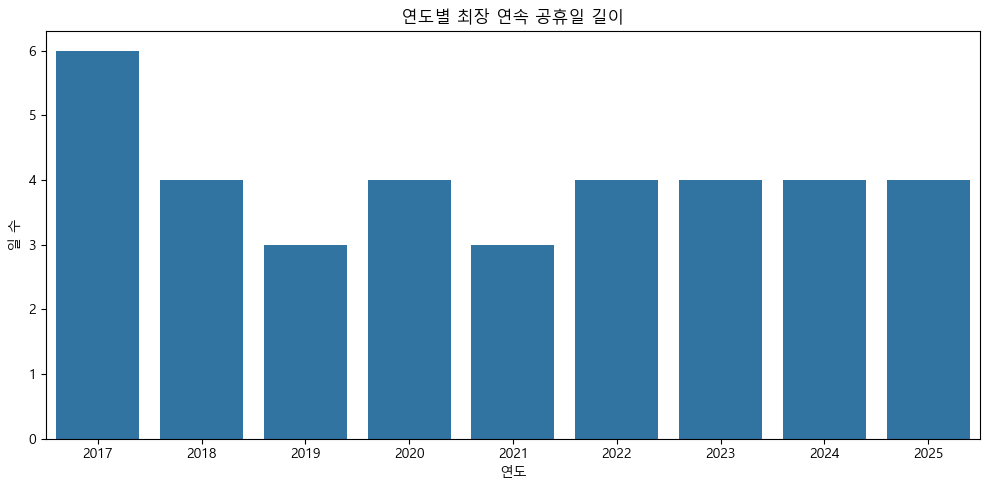

In [95]:
### 연도별 최대 연휴일 길이? 확인 ###
df['is_holiday'] = df['공휴일'].notna()
df['연속공휴일그룹'] = (df['is_holiday'] != df['is_holiday'].shift()).cumsum()
연휴길이 = df[df['is_holiday']].groupby(['연도', '연속공휴일그룹']).size()
연도별최대연휴 = 연휴길이.groupby('연도').max()

plt.figure(figsize=(10, 5))
sns.barplot(x=연도별최대연휴.index, y=연도별최대연휴.values)
plt.title("연도별 최장 연속 공휴일 길이")
plt.xlabel("연도")
plt.ylabel("일 수")
plt.tight_layout()
plt.show()
